## simulation of bounded laplace mechanism

In [1]:
import os, sys
from pathlib import Path

syndp_path = Path().cwd().parents[1].joinpath('Syndp/src')
sys.path.append(syndp_path.as_posix())

from syndp import boundedlaplacemechanism as blm

import numpy as np
import matplotlib.pyplot as plt

In [2]:
value = 0
boundary = (-1,1)
b = 9999
epsilon = 100
delta = 0

outputs = [blm(value, boundary, b, epsilon, delta, seed=i) for i in range(0,1000)]

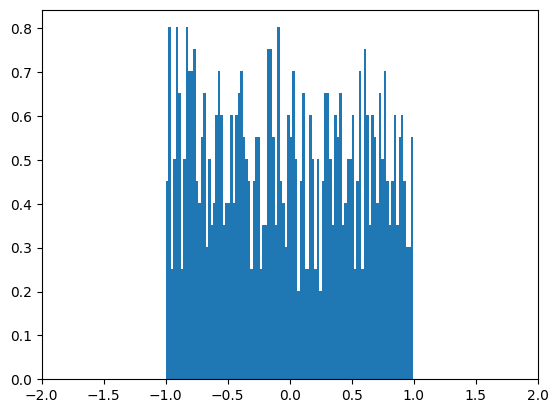

In [3]:
import matplotlib.pyplot as plt

plt.hist(outputs, bins=100, density=True)
plt.xlim(-2,2)
plt.show();

In [4]:
value = 0
boundary = (-1,1)
delta = 0
epsilons = [0, 0.1, 1, 10, 100, 1000]

test_book = {k : None for k in epsilons}

for eps in epsilons :
    test_book[eps]  =  [blm(value, boundary, 0.1, eps, delta, seed=i) for i in range(0, 1000)]

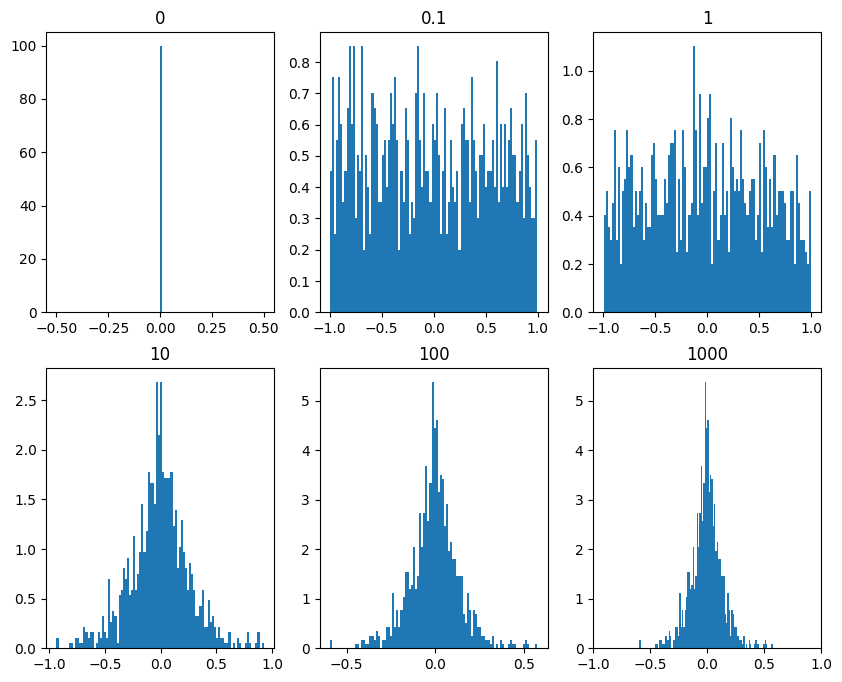

In [5]:
fig, axes = plt.subplots(2,3, figsize=(10,8))

plt.xlim(-1,1)
for idx, (eps, data) in enumerate(test_book.items()):
    r = idx // 3
    c = idx % 3
    
    # axes.xlim(-1,1)
    axes[r,c].hist(data, bins=100, density=True)
    axes[r,c].set_title(eps)

## Compare with Laplace mechanism

In [6]:
from syndp import laplace_mechanism as lm

In [7]:
value = 0
boundary = (-1,1)
delta = 0
epsilons = [0, 0.1, 1, 10, 100, 1000]

test_book = {k : None for k in epsilons}

for eps in epsilons :
    test_book[eps]  =  [lm(value, 9999, eps, seed=idx) for idx in range(0, 1000)]

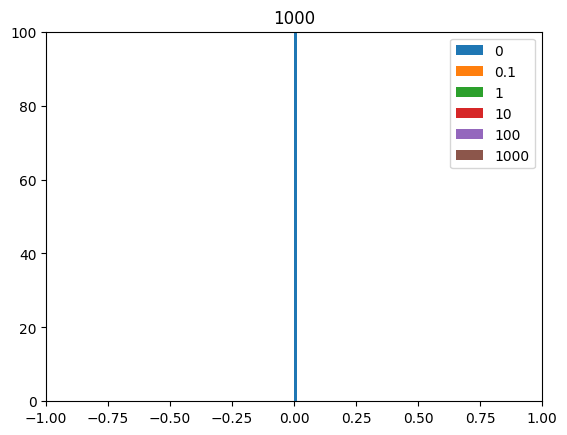

In [8]:
fig, axes = plt.subplots(1,1)

plt.xlim(-1,1)
plt.ylim(0,100)
for idx, (eps, data) in enumerate(test_book.items()):
    # r = idx // 3
    # c = idx % 3
    
    # axes.xlim(-1,1)
    axes.hist(data, bins=100, density=True, label=eps)
    axes.set_title(eps)
plt.legend()